<a href="https://colab.research.google.com/github/marcelodepaoli/01_Python_Basico/blob/main/03_Projeto_%C3%81rvores_de_Decis%C3%A3o_e_Floresta_Aleat%C3%B3ria_SOLU%C3%87%C3%95ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Floresta Aleatória - SOLUÇÕES

Para este projeto, exploraremos dados disponíveis publicamente do [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostrassem um perfil de alta probabilidade de pagar de volta. Tentaremos criar um modelo que ajude a prever isso.

O Lending Club teve um [ano muito interessante em 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), então vamos verificar alguns de seus dados e manter o contexto em mente. Esses dados são de antes mesmo de serem divulgados.

Usaremos dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou ou não seu empréstimo integralmente. Você pode baixar os dados de [aqui](https://www.lendingclub.com/info/download-data.action) ou apenas use o csv já fornecido. É recomendável que você use o csv fornecido, pois ele foi limpo de valores NA.

Aqui está o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito do LendingClub.com e 0 caso contrário.
* purpose: A finalidade do empréstimo (toma os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", e "all_other").
* int.rate: A taxa de juros do empréstimo, como proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários considerados mais arriscados pelo LendingClub.com recebem taxas de juros mais altas.
* parcela: As parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual autodeclarada do mutuário.
* dti: A relação dívida/renda do mutuário (valor da dívida dividido pela renda anual).
* fico: A pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias que o mutuário tem uma linha de crédito.
* revol.bal: saldo rotativo do tomador (valor não pago ao final do ciclo de cobrança do cartão de crédito).
* revol.util: a taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: Número de consultas do mutuário por parte dos credores nos últimos 6 meses.
* delinq.2yrs: O número de vezes que o mutuário teve mais de 30 dias de atraso em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (declarações de falência, ônus fiscais ou sentenças).

# Importar Bibliotecas

** Importe as bibliotecas usuais para pandas e plotagem. Você pode importar o sklearn mais tarde.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenha os dados

** Use pandas para ler loan_data.csv como um dataframe chamado loans.**

In [ ]:
# Esse trecho do código é obrigatório para quem estiver fazendo tudo pelo colab
# Caso você esteja utilizando o jupyter pode comentar/apagar
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/IA/15_Árvores_de_Decisão")
os.listdir()

Mounted at /content/drive


['kyphosis.csv',
 'loan_data.csv',
 'Copy of 01 - Árvores de Decisão e Florestas Aleatórias em Python.ipynb',
 '01 - Árvores de Decisão e Florestas Aleatórias em Python.ipynb',
 '03 - Projeto Árvores de Decisão e Floresta Aleatória - SOLUÇÕES.ipynb']

In [ ]:
loans = pd.read_csv('loan_data.csv')

** Confira os métodos info(), head() e describe() em loans.**

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#Análise exploratória de dados

Vamos fazer alguma visualização de dados! Usaremos recursos de plotagem incorporados do seaborn e pandas, mas sinta-se à vontade para usar qualquer biblioteca que desejar. Não se preocupe com a correspondência de cores, apenas se preocupe em obter a ideia principal.

** Crie um histograma de duas distribuições FICO uma sobre a outra, uma para cada resultado credit.policy.**

*Observação: isso é bastante complicado, sinta-se à vontade para consultar as soluções. Você provavelmente precisará de uma linha de código para cada histograma, também recomendo usar pandas embutidos em .hist()*

Text(0.5, 0, 'FICO')

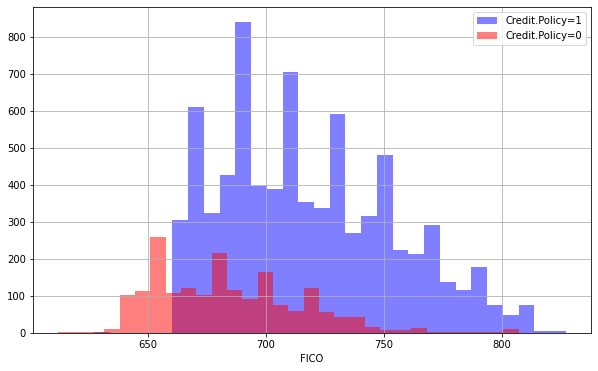

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Crie uma figura semelhante, exceto que desta vez selecione pela coluna not.fully.paid.**

Text(0.5, 0, 'FICO')

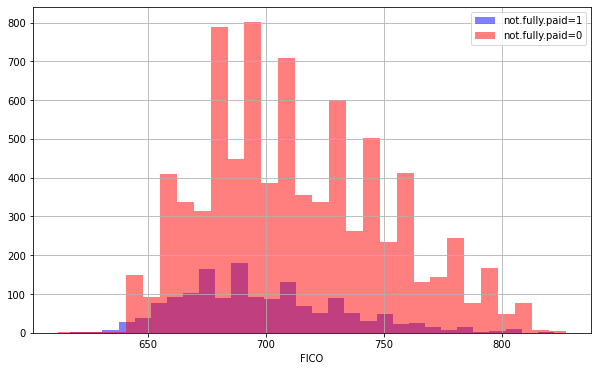

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Crie um gráfico de contagem usando seaborn mostrando as contagens de empréstimos por finalidade, com o tom de cor definido por not.fully.paid**

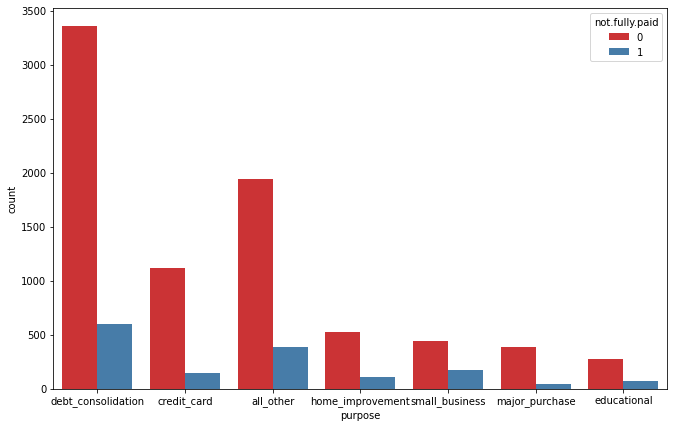

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

**Vamos ver a tendência entre a pontuação FICO e a taxa de juros. Recrie o seguinte gráfico conjunto.**

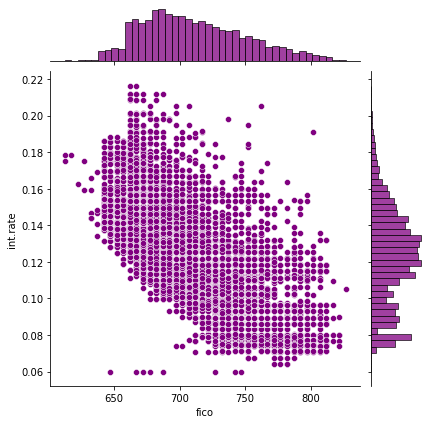

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

**Crie os seguintes lmplots para ver se a tendência diferiu entre not.fully.paid e credit.policy. Verifique a documentação de lmplot() se você não consegue descobrir como separá-lo em colunas.**

<Figure size 792x504 with 0 Axes>

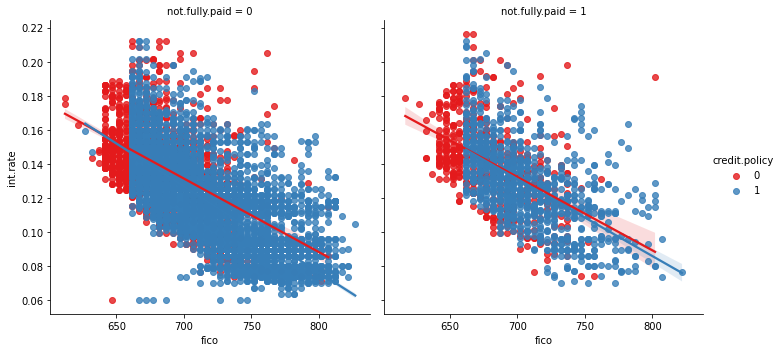

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Configurando os dados

Vamos nos preparar para configurar nossos dados para nosso Modelo de Classificação de Floresta Aleatória!

**Verifique loans.info() novamente.**

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Características categóricas

Observe que a coluna **purpose** é categórica

Isso significa que precisamos transformá-los usando variáveis ​​fictícias para que o sklearn seja capaz de entendê-los. Faremos isso utilizando pd.get_dummies.

Vamos mostrar uma maneira de lidar com essas colunas que podem ser expandidas para vários recursos categóricos, se necessário.

**Crie uma lista de 1 elemento contendo a string 'purpose'. Chame esta lista de cat_feats.**

In [ ]:
cat_feats = ['purpose']

**Agora use pd.get_dummies(loans,columns=cat_feats,drop_first=True) para criar um dataframe fixo maior que tenha novas colunas de recursos com variáveis ​​fictícias. Defina este dataframe como final_data.**

In [ ]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Divisão de teste de trem

Agora é hora de dividir nossos dados em um conjunto de treinamento e um conjunto de teste!

** Use sklearn para dividir seus dados em um conjunto de treinamento e um conjunto de teste, como fizemos no passado.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Treinando um modelo de árvore de decisão

Vamos começar treinando uma única árvore de decisão primeiro!

** Importar DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Crie uma instância de DecisionTreeClassifier() chamada dtree e ajuste-a aos dados de treinamento.**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Previsões e Avaliação da Árvore de Decisão

**Crie previsões a partir do conjunto de testes e crie um relatório de classificação e uma matriz de confusão.**


In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1995  436]
 [ 341  102]]


## Treinando o modelo Random Forest

Agora é hora de treinar nosso modelo!

**Crie uma instância da classe RandomForestClassifier e ajuste-a aos nossos dados de treinamento da etapa anterior.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Previsões e Avaliação

Vamos prever os valores de y_test e avaliar nosso modelo.

** Preveja a classe de not.fully.paid para os dados do X_test.**

In [ ]:
predictions = rfc.predict(X_test)

**Agora crie um relatório de classificação a partir dos resultados. Você recebe algo estranho ou algum tipo de aviso?**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



**Mostre a Matriz de Confusão para as previsões.**

In [ ]:
print(confusion_matrix(y_test,predictions))

[[2424    7]
 [ 435    8]]


**O que teve melhor desempenho a floresta aleatória ou a árvore de decisão?**

In [ ]:
# Depende de qual métrica você está tentando otimizar.
# Observe o recall de cada classe para os modelos.
# Nenhum dos dois foi muito bem, é necessário mais engenharia de recursos.